# DATA PREPROCESSING & MODELING

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
data=pd.read_csv('/storage/emulated/0/Android/data/ru.iiec.pydroid3/files/OSM EDA.csv')
print(data)
data=data.drop('Unnamed: 0', axis=1)
print(data)

     Unnamed: 0  CustomerID  Gender   Age  \
0             0         1.0       0  19.0   
1             1         2.0       0  21.0   
2             2         3.0       1  20.0   
3             3         4.0       1  23.0   
4             4         5.0       1  31.0   
..          ...         ...     ...   ...   
195         195       196.0       1  35.0   
196         196       197.0       1  45.0   
197         197       198.0       0  32.0   
198         198       199.0       0  32.0   
199         199       200.0       0  30.0   

     Monthly Income per thousand (Naira)  Spending Score (1-100)  
0                                     15                    39.0  
1                                     15                    81.0  
2                                     16                     6.0  
3                                     16                    77.0  
4                                     17                    40.0  
..                                   ...                 

In [65]:
from sklearn import preprocessing as pps
import numpy as np
scale_d=pps.MinMaxScaler(feature_range=(0,1))
data1=np.array(data['Gender'])
data2=np.array(data['Age'])
data3=np.array(data['Monthly Income per thousand (Naira)'])
data4=np.array(data['Spending Score (1-100)'])


sc_d1=scale_d.fit_transform(data1.reshape(200,1))
sc_d2=scale_d.fit_transform(data2.reshape(200,1))
sc_d3=scale_d.fit_transform(data3.reshape(200,1))
sc_d4=scale_d.fit_transform(data4.reshape(200,1))


data['Gender']= sc_d1
data['Age']= sc_d2
data['Monthly Income per thousand (Naira)']= sc_d3
data['Spending Score (1-100)']= sc_d4



print(data)


     CustomerID  Gender       Age  Monthly Income per thousand (Naira)  \
0           1.0     0.0  0.019231                             0.000000   
1           2.0     0.0  0.057692                             0.000000   
2           3.0     1.0  0.038462                             0.008197   
3           4.0     1.0  0.096154                             0.008197   
4           5.0     1.0  0.250000                             0.016393   
..          ...     ...       ...                                  ...   
195       196.0     1.0  0.326923                             0.860656   
196       197.0     1.0  0.519231                             0.909836   
197       198.0     0.0  0.269231                             0.909836   
198       199.0     0.0  0.269231                             1.000000   
199       200.0     0.0  0.230769                             1.000000   

     Spending Score (1-100)  
0                  0.387755  
1                  0.816327  
2                  0.

In [66]:
from sklearn import preprocessing as pps

std_d1=pps.StandardScaler().fit_transform(sc_d1)
std_d2=pps.StandardScaler().fit_transform(sc_d2)
std_d3=pps.StandardScaler().fit_transform(sc_d3)
std_d4=pps.StandardScaler().fit_transform(sc_d4)


data['Gender']= std_d1
data['Age']= std_d2
data['Monthly Income per thousand (Naira)']= std_d3
data['Spending Score (1-100)']= std_d4


print(data)





     CustomerID    Gender       Age  Monthly Income per thousand (Naira)  \
0           1.0 -1.128152 -1.424569                            -1.738999   
1           2.0 -1.128152 -1.281035                            -1.738999   
2           3.0  0.886405 -1.352802                            -1.700830   
3           4.0  0.886405 -1.137502                            -1.700830   
4           5.0  0.886405 -0.563369                            -1.662660   
..          ...       ...       ...                                  ...   
195       196.0  0.886405 -0.276302                             2.268791   
196       197.0  0.886405  0.441365                             2.497807   
197       198.0 -1.128152 -0.491602                             2.497807   
198       199.0 -1.128152 -0.491602                             2.917671   
199       200.0 -1.128152 -0.635135                             2.917671   

     Spending Score (1-100)  
0                 -0.434801  
1                  1.195704

kn2 is 167319.91408313357
kn3 is 74701.90563027878
kn4 is 42363.709533917325
kn5 is 27251.976860783558
kn6 is 19182.85584326248
kn7 is 14236.378813398112
   Id
0   1
1   2
2   3
3   4
4   5
5   6
   Id  clusters        inertia
0   1         2  167319.914083
1   2         3   74701.905630
2   3         4   42363.709534
3   4         5   27251.976861
4   5         6   19182.855843
5   6         7   14236.378813


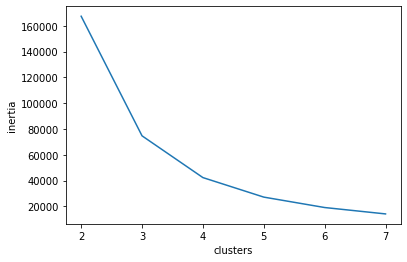

In [67]:
from sklearn.cluster import KMeans


km= KMeans(n_clusters=2)
km.fit(data)
kn2=km.inertia_
print ('kn2 is',kn2)
km3= KMeans(n_clusters=3)
km3.fit(data)
kn3=km3.inertia_
print('kn3 is', kn3)
km4= KMeans(n_clusters=4)
km4.fit(data)
kn4=km4.inertia_
print('kn4 is', kn4)
km5= KMeans(n_clusters=5)
km5.fit(data)
kn5=km5.inertia_
print('kn5 is', kn5)
km6= KMeans(n_clusters=6)
km6.fit(data)
kn6=km6.inertia_ 
print('kn6 is', kn6)
km7= KMeans(n_clusters=7)
km7.fit(data)
kn7=km7.inertia_
print('kn7 is', kn7)
 
clusters=[2,3,4,5,6,7]
inerti=[kn2,kn3,kn4,kn5,kn6,kn7]

inertia={'Id': [1,2,3,4,5,6,]}
inertia1=pd.DataFrame(inertia)
print(inertia1)

inertia1['clusters']=clusters
inertia1['inertia']=inerti
print (inertia1)


sns.lineplot(x='clusters', y='inertia', data=inertia1)
      

The least slope is 5, suitable for the elbow method.

In [68]:
from sklearn.model_selection import train_test_split
x=data[['Spending Score (1-100)', 'Monthly Income per thousand (Naira)']]
X_train, X_test=train_test_split(x,train_size=0.8, random_state=1)
print(x)
k_opt=5
kmeans=KMeans(k_opt)
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)
print(y_pred)

kmeans1=KMeans(k_opt)
kmeans1.fit(x)
y=kmeans.predict(x)
print(y)


     Spending Score (1-100)  Monthly Income per thousand (Naira)
0                 -0.434801                            -1.738999
1                  1.195704                            -1.738999
2                 -1.715913                            -1.700830
3                  1.040418                            -1.700830
4                 -0.395980                            -1.662660
..                      ...                                  ...
195                1.118061                             2.268791
196               -0.861839                             2.497807
197                0.923953                             2.497807
198               -1.250054                             2.917671
199                1.273347                             2.917671

[200 rows x 2 columns]
[0 0 3 0 2 2 0 3 4 2 1 3 4 0 0 0 1 4 2 0 0 3 3 0 4 2 3 3 1 4 0 1 2 1 2 0 2
 0 0 2]
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 0 4 0 0 3 4 0 0 0 0 0 0 0 0 0 0

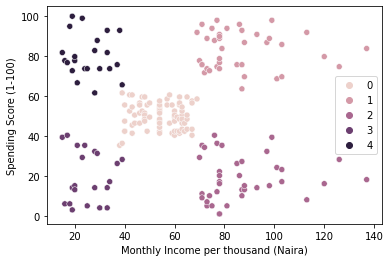

In [73]:
scale_sp=pps.MinMaxScaler(feature_range=(1,100))
scale_mit=pps.MinMaxScaler(feature_range=(15,137))

arr1=np.array(data['Spending Score (1-100)'])
arr2=np.array(data['Monthly Income per thousand (Naira)'])

data['Spending Score (1-100)']=scale_sp.fit_transform(arr1.reshape(200,1))
data['Monthly Income per thousand (Naira)']=scale_mit.fit_transform(arr2.reshape(200,1))
                                                      

cl=sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Monthly Income per thousand (Naira)'], hue=y)

# Insights
The customers are categorized into 5 clusters
Group 0 are average earners & spenders(middle class)
Group 1 are High earners and High spenders (Rich spenders)
Group 2 are High Earners but low spenders (stingy Rich)
Group 3 are Low earners & spenders (dead broke)
Group 4 are Low earners but High speanders (broke spenders)

# The marketing strategy should be targeted at Group 0,1&4
